In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [19]:
#Importing the data ,creating dataframe
df=pd.read_csv("housing.csv")
df

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Unnamed: 11,Unnamed: 12
0,1,-122.23,37.88,41,880.0,129.0,322,126,8.6252,452900,NEAR BAY,NaN,NaN
1,2,-122.22,37.86,21,7099.0,1106.0,2401,1138,8.6014,358800,NEAR BAY,NaN,NaN
2,3,-122.24,37.85,52,1467.0,190.0,496,177,7.5574,352400,NEAR BAY,NaN,NaN
3,4,-122.25,37.85,52,1274.0,235.0,558,219,5.9431,341600,NEAR BAY,NaN,NaN
4,5,-122.25,37.85,52,1627.0,280.0,565,259,4.1462,342500,NEAR BAY,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20636,-121.09,39.48,25,1665.0,374.0,845,330,1.8603,78400,INLAND,NaN,NaN
20636,20637,-121.21,39.49,18,697.0,150.0,356,114,2.8568,77400,INLAND,NaN,NaN
20637,20638,-121.22,39.43,17,2254.0,485.0,1007,433,2.0000,92600,INLAND,NaN,NaN
20638,20639,-121.32,39.43,18,1860.0,409.0,741,349,2.1672,85000,INLAND,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  int64  
 4   total_rooms         20637 non-null  float64
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  int64  
 7   households          20640 non-null  object 
 8   median_income       20636 non-null  float64
 9   median_house_value  20640 non-null  int64  
 10  ocean_proximity     20630 non-null  object 
 11  Unnamed: 11         0 non-null      float64
 12  Unnamed: 12         0 non-null      float64
dtypes: float64(7), int64(4), object(2)
memory usage: 2.0+ MB


In [20]:
#Removing the two columns named "Unnamed:11 and Unnamed: 12" as they are empty and also "id" column  as it  doesnt relate to our goal "
df.drop(['Unnamed: 11','Unnamed: 12','id'],axis=1,inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880.0,129.0,322,126,8.6252,452900,NEAR BAY
1,-122.22,37.86,21,7099.0,1106.0,2401,1138,8.6014,358800,NEAR BAY
2,-122.24,37.85,52,1467.0,190.0,496,177,7.5574,352400,NEAR BAY
3,-122.25,37.85,52,1274.0,235.0,558,219,5.9431,341600,NEAR BAY
4,-122.25,37.85,52,1627.0,280.0,565,259,4.1462,342500,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845,330,1.8603,78400,INLAND
20636,-121.21,39.49,18,697.0,150.0,356,114,2.8568,77400,INLAND
20637,-121.22,39.43,17,2254.0,485.0,1007,433,2.0000,92600,INLAND
20638,-121.32,39.43,18,1860.0,409.0,741,349,2.1672,85000,INLAND


In [21]:
#Checking if there are any empty row values for any feature
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             3
total_bedrooms        207
population              0
households              0
median_income           4
median_house_value      0
ocean_proximity        10
dtype: int64

##Here we see out total_bedrooms has 207 empty rows, we impute the mean value for this column for the empty cells .
Also, total_rooms, median_income & ocean_proximity has very few empty rows, we delete those rows as they don't have much impact in this big dataset.

In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True) #Replacing with mean value
df.dropna(inplace=True) #Dropping remaining empty rows
df.isna().sum()



longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [37]:
#Checking if there are any duplicate values
df.duplicated().sum()

0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20623 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20623 non-null  float64
 1   latitude            20623 non-null  float64
 2   housing_median_age  20623 non-null  int64  
 3   total_rooms         20623 non-null  float64
 4   total_bedrooms      20623 non-null  float64
 5   population          20623 non-null  int64  
 6   households          20623 non-null  object 
 7   median_income       20623 non-null  float64
 8   median_house_value  20623 non-null  int64  
 9   ocean_proximity     20623 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 1.7+ MB


#### Changing datatype of 'households" column to float from object as it contains all numeric data.
#### However, the household column has 2 date values, so we drop two date values and convert the column datatype to float64

In [44]:
#Trying to change datatype of Households to Float, but we get an error, as some date values are present
#So we have to clean the column Households from those values and then change datatype to Float


#df['households']=df['households'].astype(float)---> thorws error sue to presence of dates
df=df.drop(df[(df['households']=='23-05-2011') | (df['households']=='21-05-2011')].index)

df['households']=df['households'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20620 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20620 non-null  float64
 1   latitude            20620 non-null  float64
 2   housing_median_age  20620 non-null  int64  
 3   total_rooms         20620 non-null  float64
 4   total_bedrooms      20620 non-null  float64
 5   population          20620 non-null  int64  
 6   households          20620 non-null  float64
 7   median_income       20620 non-null  float64
 8   median_house_value  20620 non-null  int64  
 9   ocean_proximity     20620 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 1.7+ MB


## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Distribution of total_rooms')

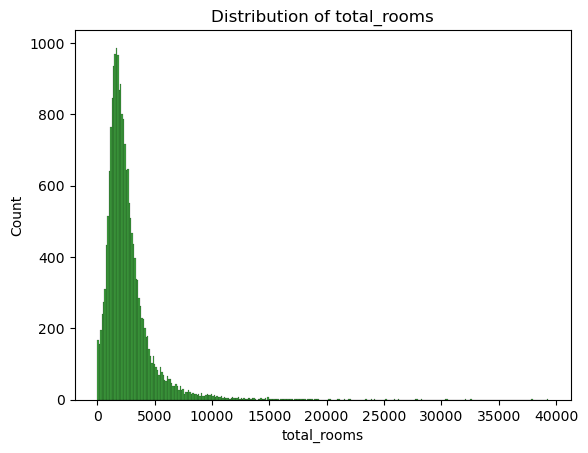

In [54]:
# Distribution of total_rooms
sns.histplot(df['total_rooms'],color='g')
plt.title("Distribution of total_rooms")

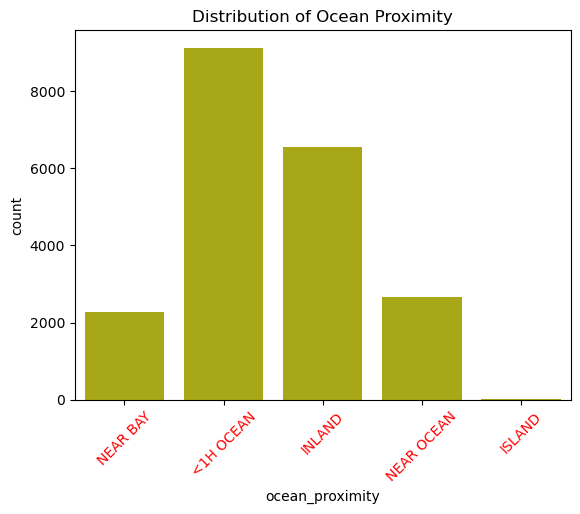

In [53]:
#Distribution of Ocean Proximity
sns.countplot(x=df["ocean_proximity"],color='y')
plt.xticks(rotation=45,color='r')
plt.title("Distribution of Ocean Proximity")
plt.show()